<a href="https://colab.research.google.com/github/amirlb/civilhack-2019/blob/master/OpenBus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/CivicHackFiles')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/CivicHackFiles


In [0]:
import numpy as np
import pandas as pd
from datetime import time

In [7]:
gtfs_file_path = '/content/CivicHackFiles/My Drive/Colab_Notebooks/CivicHack/2019-03-23_route_stats.csv'
gtfs_df = pd.read_csv(gtfs_file_path)
list(gtfs_df)

['Unnamed: 0',
 'route_id',
 'route_short_name',
 'agency_id',
 'agency_name',
 'route_long_name',
 'route_type',
 'route_mkt',
 'route_direction',
 'route_alternative',
 'num_trips',
 'num_trip_starts',
 'num_trip_ends',
 'is_loop',
 'is_bidirectional',
 'start_time',
 'end_time',
 'max_headway',
 'min_headway',
 'mean_headway',
 'peak_num_trips',
 'peak_start_time',
 'peak_end_time',
 'service_distance',
 'service_duration',
 'service_speed',
 'mean_trip_distance',
 'mean_trip_duration',
 'start_stop_id',
 'end_stop_id',
 'start_stop_name',
 'end_stop_name',
 'start_stop_city',
 'end_stop_city',
 'start_stop_desc',
 'end_stop_desc',
 'start_stop_lat',
 'start_stop_lon',
 'end_stop_lat',
 'end_stop_lon',
 'num_stops',
 'start_zone',
 'end_zone',
 'num_zones',
 'num_zones_missing',
 'all_stop_latlon',
 'all_stop_code',
 'all_stop_id',
 'all_stop_desc_city',
 'all_start_time',
 'all_trip_id',
 'date']

In [97]:
SIRI_file_path = '/content/CivicHackFiles/My Drive/Colab_Notebooks/CivicHack/namir_routes_2019-03-17_2019-03-23.csv'
siri_df = pd.read_csv(SIRI_file_path)
siri_df.head(5)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,timestamp,time_recorded,agency_id,route_short_name,route_id,bus_id,trip_id_to_date,planned_start_time,predicted_end_time,lat,lon
0,2019-03-23T23:59:13.048,23:59:08,15,24,2365,36752501,35896661,23:30:00,00:18:00,32.121567,34.801220
1,2019-03-23T23:59:13.011,23:59:19,5,89,9788,10042,36927060,23:50:00,00:43:00,32.020893,34.776009
2,2019-03-23T23:59:13.011,23:58:57,5,89,9788,10033,36927059,23:00:00,00:01:00,32.116261,34.833561
3,2019-03-23T23:59:12.882,23:58:59,5,89,9786,10359,36371309,23:10:00,00:09:00,32.022854,34.774345
4,2019-03-23T23:59:12.773,23:59:04,15,24,2362,36760101,35896265,23:15:00,00:13:00,32.128086,34.828445


In [48]:
siri_df.loc[siri_df['route_id']==15116]


,timestamp,time_recorded,agency_id,route_short_name,route_id,bus_id,trip_id_to_date,planned_start_time,predicted_end_time,lat,lon
267376,2019-03-21T08:42:09.199,08:42:20,15,349,15116,8924733,19160717,06:50:00,08:43:00,32.057167,34.777229
267622,2019-03-21T08:41:09.181,08:41:20,15,349,15116,8924733,19160717,06:50:00,08:43:00,32.058086,34.776901
267877,2019-03-21T08:40:09.154,08:40:15,15,349,15116,8924733,19160717,06:50:00,08:43:00,32.058693,34.775208
268126,2019-03-21T08:39:09.16,08:39:16,15,349,15116,8924733,19160717,06:50:00,08:43:00,32.059601,34.773705
268374,2019-03-21T08:38:09.164,08:38:14,15,349,15116,8924733,19160717,06:50:00,08:43:00,32.059750,34.773731
268626,2019-03-21T08:37:09.148,08:37:12,15,349,15116,8924733,19160717,06:50:00,08:43:00,32.061298,34.773674
268885,2019-03-21T08:36:09.132,08:36:15,15,349,15116,8924733,19160717,06:50:00,08:44:00,32.064796,34.772491
269141,2019-03-21T08:35:09.223,08:35:07,15,349,15116,8924733,19160717,06:50:00,08:45:00,32.066376,34.771709
269398,2019-03-21T08:34:09.146,08:34:13,15,349,15116,8924733,19160717,06:50:00,08:44:00,32.068844,34.770741
269656,2019-03-21T08:33:09.134,08:33:13,15,349,15116,8924733,19160717,06:50:00,08:43:00,32.070183,34.770958


In [50]:
siri_df.loc[siri_df['route_id']==15116].trip_id_to_date.unique()

array([19160717, 19160712, 19160714, 19160709, 19160716, 19160715,
       19160710, 19160713, 19160708])

In [81]:
one_drive_df = siri_df.loc[siri_df['trip_id_to_date']==19160716].sort_values(by=['timestamp'])
one_drive1_df = siri_df.loc[siri_df['trip_id_to_date']==19160708].sort_values(by=['timestamp'])
one_drive2_df = siri_df.loc[siri_df['trip_id_to_date']==19160712].sort_values(by=['timestamp'])
one_drive_df

,timestamp,time_recorded,agency_id,route_short_name,route_id,bus_id,trip_id_to_date,planned_start_time,predicted_end_time,lat,lon,estimated_ride_duration
569563,2019-03-20T07:41:56.507,07:41:47,15,349,15116,8924733,19160716,06:50:00,08:17:00,32.170643,34.928802,87.0
569458,2019-03-20T07:42:56.518,07:43:03,15,349,15116,8924733,19160716,06:50:00,08:17:00,32.170826,34.925316,87.0
569353,2019-03-20T07:43:56.548,07:44:01,15,349,15116,8924733,19160716,06:50:00,08:18:00,32.171741,34.923462,88.0
569249,2019-03-20T07:44:56.863,07:44:43,15,349,15116,8924733,19160716,06:50:00,09:20:00,32.172253,34.921982,150.0
569131,2019-03-20T07:45:56.907,07:45:53,15,349,15116,8924733,19160716,06:50:00,09:20:00,32.172691,34.920189,150.0
569011,2019-03-20T07:46:56.951,07:46:51,15,349,15116,8924733,19160716,06:50:00,09:20:00,32.173401,34.916969,150.0
568886,2019-03-20T07:47:56.98,07:47:32,15,349,15116,8924733,19160716,06:50:00,08:50:00,32.173649,34.915989,120.0
568760,2019-03-20T07:48:56.994,07:48:56,15,349,15116,8924733,19160716,06:50:00,08:48:00,32.174095,34.913883,118.0
568633,2019-03-20T07:49:57.005,07:50:00,15,349,15116,8924733,19160716,06:50:00,08:47:00,32.174957,34.910042,117.0
568504,2019-03-20T07:50:57.032,07:50:42,15,349,15116,8924733,19160716,06:50:00,08:47:00,32.175072,34.909599,117.0


In [0]:
def is_in_near_future(input_ts, base_h, base_m, limit_h, limit_m):
    if limit_h < 24:
        return time(base_h, base_m) <= input_ts <= time(limit_h, limit_m)
    else:
        return ((time(base_h, base_m) <= input_ts <= time(23, 59, 59)) 
                or (time(0, 0) <= input_ts <= time(limit_h % 24, limit_m)))

In [0]:
def strtime_to_time(s):
    return time(int(s[0:2]), int(s[3:5]), int(s[6:]))

In [0]:
def calculate_time_diff(df):
  FMT = '%H:%M:%S'
  tdelta = datetime.strptime(df['predicted_end_time'], FMT) - datetime.strptime(df['planned_start_time'], FMT)
  return (tdelta.total_seconds()%86400)/60


In [0]:
siri_df['estimated_ride_duration'] = siri_df.apply(calculate_time_diff, axis=1)

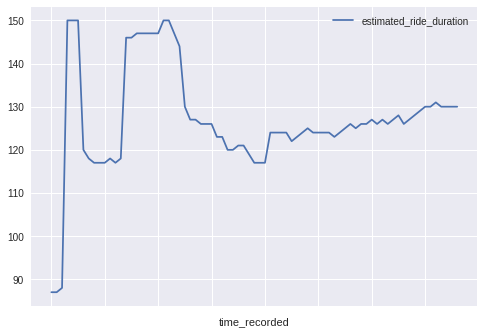

In [78]:
one_drive_df.plot(x='time_recorded', y='estimated_ride_duration')

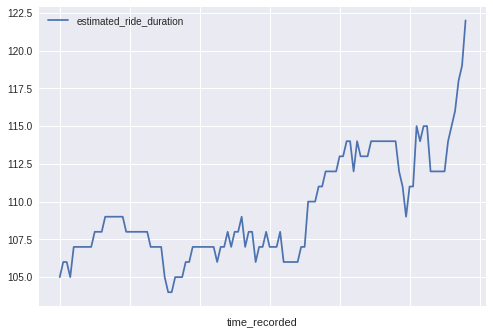

In [82]:
one_drive1_df.plot(x='time_recorded', y='estimated_ride_duration')

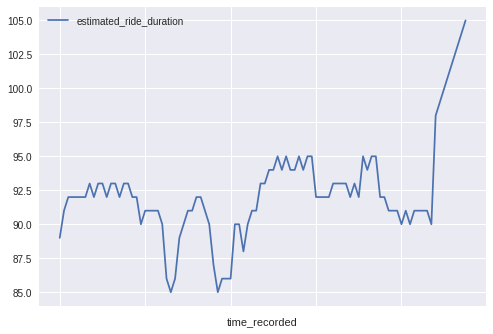

In [83]:
one_drive2_df.plot(x='time_recorded', y='estimated_ride_duration')

trip_id_to_date
25280841    AxesSubplot(0.125,0.125;0.775x0.755)
25280842    AxesSubplot(0.125,0.125;0.775x0.755)
25280843    AxesSubplot(0.125,0.125;0.775x0.755)
25280844    AxesSubplot(0.125,0.125;0.775x0.755)
25280845    AxesSubplot(0.125,0.125;0.775x0.755)
25280846    AxesSubplot(0.125,0.125;0.775x0.755)
25280847    AxesSubplot(0.125,0.125;0.775x0.755)
25280848    AxesSubplot(0.125,0.125;0.775x0.755)
26585888    AxesSubplot(0.125,0.125;0.775x0.755)
26585889    AxesSubplot(0.125,0.125;0.775x0.755)
26585890    AxesSubplot(0.125,0.125;0.775x0.755)
26585891    AxesSubplot(0.125,0.125;0.775x0.755)
26585892    AxesSubplot(0.125,0.125;0.775x0.755)
26585893    AxesSubplot(0.125,0.125;0.775x0.755)
26585894    AxesSubplot(0.125,0.125;0.775x0.755)
29210897    AxesSubplot(0.125,0.125;0.775x0.755)
29210898    AxesSubplot(0.125,0.125;0.775x0.755)
30676979    AxesSubplot(0.125,0.125;0.775x0.755)
30676980    AxesSubplot(0.125,0.125;0.775x0.755)
30676981    AxesSubplot(0.125,0.125;0.775x0.755)
3067

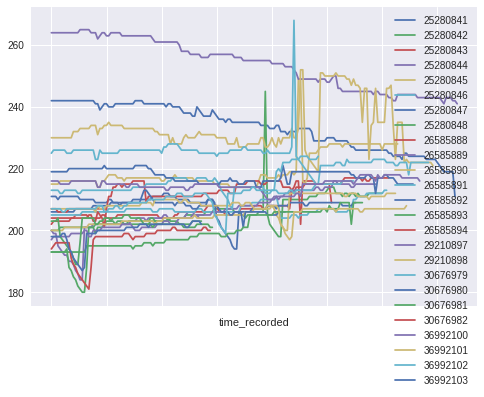

In [104]:
# siri_df.plot(x='time_recorded', y='estimated_ride_duration')
# for route_id in siri_df.route_id.unique():
df = siri_df.loc[siri_df['route_id']==19732]
df.head(5)
# df.plot(x='time_recorded', y='estimated_ride_duration')
df.set_index('time_recorded', inplace=True)
df.groupby('trip_id_to_date')['estimated_ride_duration'].plot(legend=True)

# siri_df.set_index('timestamp', inplace=True)
# siri_df.groupby('trip_id_to_date')['estimated_ride_duration'].plot(legend=True)

In [91]:
siri_df.route_id.unique()

array([ 2365,  9788,  9786,  2362,  9789,  9785,  9825,   712,   711,
        2964,  2259, 18077,  2380,  9827,  2962,  9866,  9867, 19354,
        7707,  9723, 22057, 16497, 19353,  7705, 17185,   698, 16495,
       16747, 16748, 17174, 17175, 19970, 19971,  9877,  9880,  9844,
        5307,  9872,  5301,  2374,  7189,  9873,  5193,  7111,  5311,
        7112,  7068, 19731,  7072, 19733,  7161,  7159,  7103,  7070,
        7188, 19732,  7117, 15123,  5309,  2369,  2961,  2963,  7719,
        2379, 10934, 10120,  2275,  2276, 22826, 22825, 13554,  7716,
        7152,  7166,  9847,  7192,  5189,  2314,  2466, 21999,   700,
        2467,  2778,   721,   960,  3383, 21997,  2777,  5198,  2376,
        2381,   719, 10119, 10933,  7154,  7168,  7720,  9845,  2373,
        7083, 13347, 25485, 10978, 10983,  9878, 19693,  9211,  9881,
        2377, 18035, 22058,  7728,  9724,  7727, 17209,  7190,  5310,
       17912,  2382, 17194,   718, 21698, 16353, 21993, 22052, 17911,
       16352, 11677,